In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from LogisticRegression import LogisticRegression

### 导入训练数据

In [3]:
from sklearn.datasets import load_iris

In [4]:
data = load_iris()
X = data.data
y = data.target
X = X[y<2,:2]
y =y[y<2]

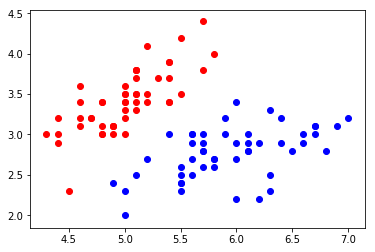

In [5]:
plt.scatter(X[y==0,0],X[y==0,1],color="r")
plt.scatter(X[y==1,0],X[y==1,1],color="b")
plt.show()

### 分割数据

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

### 训练模型

In [8]:
logisticRegression = LogisticRegression()

In [9]:
logisticRegression.fit(X_train,y_train)

LogisticRegression()

In [10]:
logisticRegression.score(X_test,y_test)

1.0

In [11]:

logisticRegression.predict_probality(X_test)

array([ 0.82123123,  0.03228488,  0.09153798,  0.02669429,  0.13132865,
        0.97159908,  0.14291257,  0.97669236,  0.92636147,  0.93905857,
        0.95826336,  0.0526657 ,  0.87252712,  0.06292991,  0.14206232,
        0.9786764 ,  0.98936537,  0.71424794,  0.03548951,  0.9870046 ,
        0.00323706,  0.03548951,  0.01608174,  0.16960374,  0.05739493])

In [12]:
y_test

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0])

### 决策边界

In [16]:
def x2(x1):
    return (-logisticRegression.coef_[0]*x1 - logisticRegression.intercept_)/logisticRegression.coef_[1]


In [17]:
plot_x = np.linspace(4,10,1000)

In [18]:
plot_y = x2(plot_x)

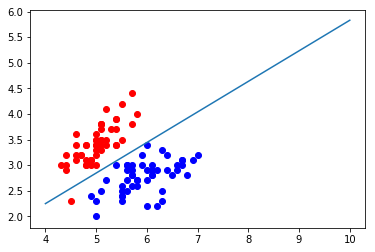

In [19]:
plt.scatter(X[y==0,0],X[y==0,1],color="r")
plt.scatter(X[y==1,0],X[y==1,1],color="b")
plt.plot(plot_x,plot_y)
plt.show()

### 测试集上的结果

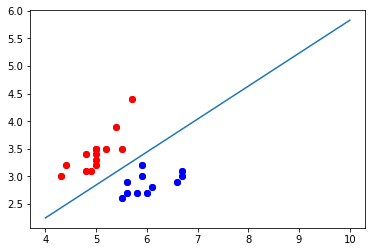

In [22]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], color="red")
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], color="blue")
plt.plot(plot_x,plot_y)
plt.show()

In [26]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


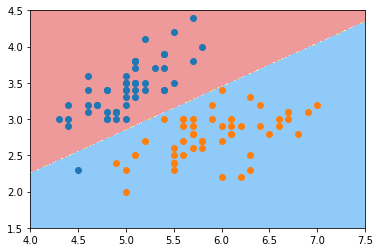

In [27]:
    plot_decision_boundary(logisticRegression, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 看看KNN的决策边界

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_cls = KNeighborsClassifier()

In [30]:
knn_cls.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


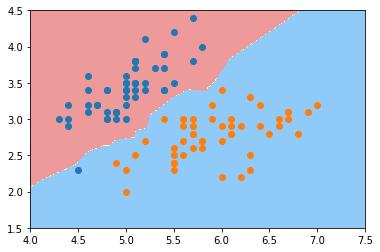

In [31]:
plot_decision_boundary(knn_cls, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### KNN多分类问题的决策边界

In [33]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(data.data[:,:2], data.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


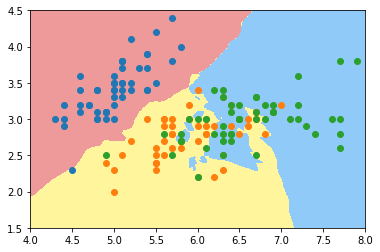

In [37]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(data.data[data.target==0,0], data.data[data.target==0,1])
plt.scatter(data.data[data.target==1,0], data.data[data.target==1,1])
plt.scatter(data.data[data.target==2,0], data.data[data.target==2,1])
plt.show()

过拟合了！

### 调整超参数！

In [44]:
knn_clf_all = KNeighborsClassifier(n_neighbors=100)
knn_clf_all.fit(data.data[:,:2], data.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

D:\Anaconda\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


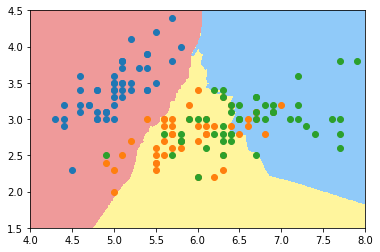

In [45]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(data.data[data.target==0,0], data.data[data.target==0,1])
plt.scatter(data.data[data.target==1,0], data.data[data.target==1,1])
plt.scatter(data.data[data.target==2,0], data.data[data.target==2,1])
plt.show()